<a href="https://colab.research.google.com/github/o-bissing/blood_cell_segmentation/blob/main/Image_segmentation4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("/content/002f20ad-2ace-499c-9335-c9080bc3e6b5.png")

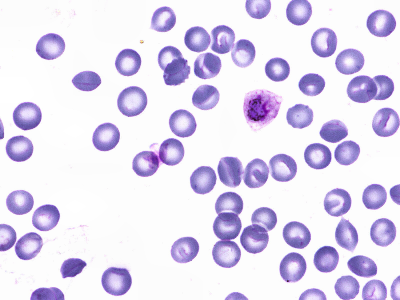

In [3]:
from google.colab.patches import cv2_imshow
resized_image = cv2.resize(img, (400,300))
cv2_imshow(resized_image)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [5]:
# Threshhold + Otsu algorithm
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

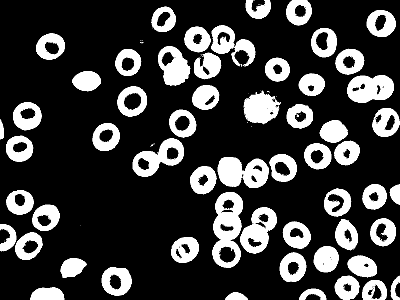

In [6]:
resized_image = cv2.resize(thresh, (400,300))
cv2_imshow(resized_image)

In [7]:
# Noise removal
kernel = np.ones((3,3),np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [8]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

In [9]:
from skimage.segmentation import clear_border
opening = clear_border(opening)

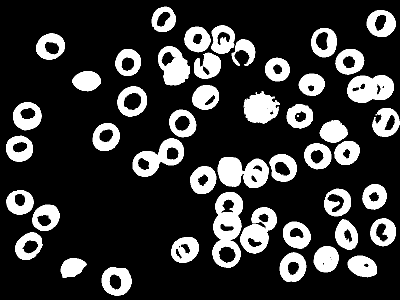

In [10]:
resized_image = cv2.resize(opening, (400,300))
cv2_imshow(resized_image)

In [11]:
# Filling the holes
test = opening.copy()

In [12]:
th,im_th = cv2.threshold(test,220,255,cv2.THRESH_BINARY_INV)
im_floodfill = im_th.copy()
h,w = im_th.shape[:2]

In [13]:
mask = np.zeros((h+2,w+2), np.uint8)
cv2.floodFill(test,mask,(0,0),255)
im_floodfill_inv = cv2.bitwise_not(test)
im_out = im_floodfill_inv + opening.copy()

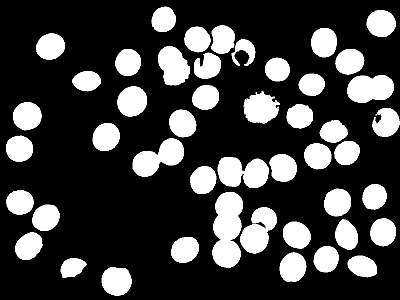

In [14]:
resized_image = cv2.resize(im_out, (400,300))
cv2_imshow(resized_image)

In [15]:
# Distance transformation
dist_transform = cv2.distanceTransform(im_out,cv2.DIST_L2,5)

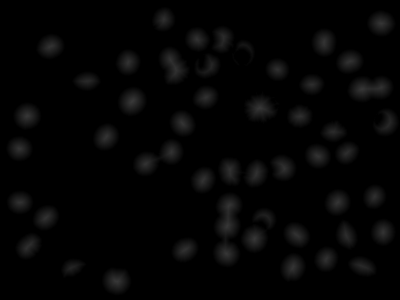

In [16]:
resized_image = cv2.resize(dist_transform, (400,300))
cv2_imshow(resized_image)

In [17]:
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)

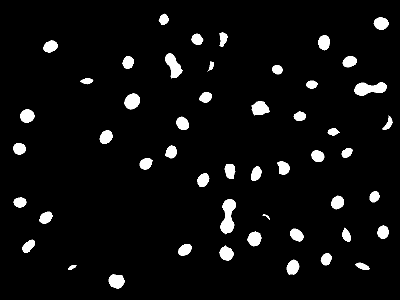

In [18]:
resized_image = cv2.resize(sure_fg, (400,300))
cv2_imshow(resized_image)

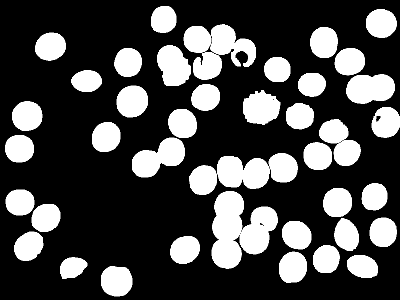

In [19]:
sure_bg = cv2.dilate(im_out,kernel,iterations=3)
resized_image = cv2.resize(sure_bg, (400,300))
cv2_imshow(resized_image)

In [20]:
sure_fg = np.uint8(sure_fg) # casting as an integer

In [21]:
unknown = cv2.subtract(sure_bg,sure_fg)

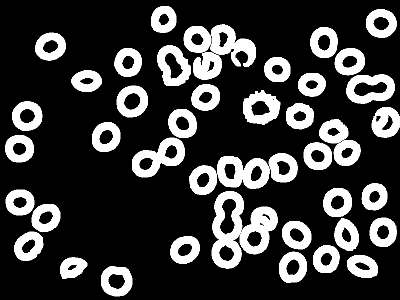

In [22]:
resized_image = cv2.resize(unknown, (400,300))
cv2_imshow(resized_image)

In [23]:
ret,markers = cv2.connectedComponents(sure_fg)

In [24]:
markers = markers + 1

In [25]:
markers[unknown==255] = 0

In [26]:
markers_normalized = cv2.normalize(markers, None, 0, 255, cv2.NORM_MINMAX)

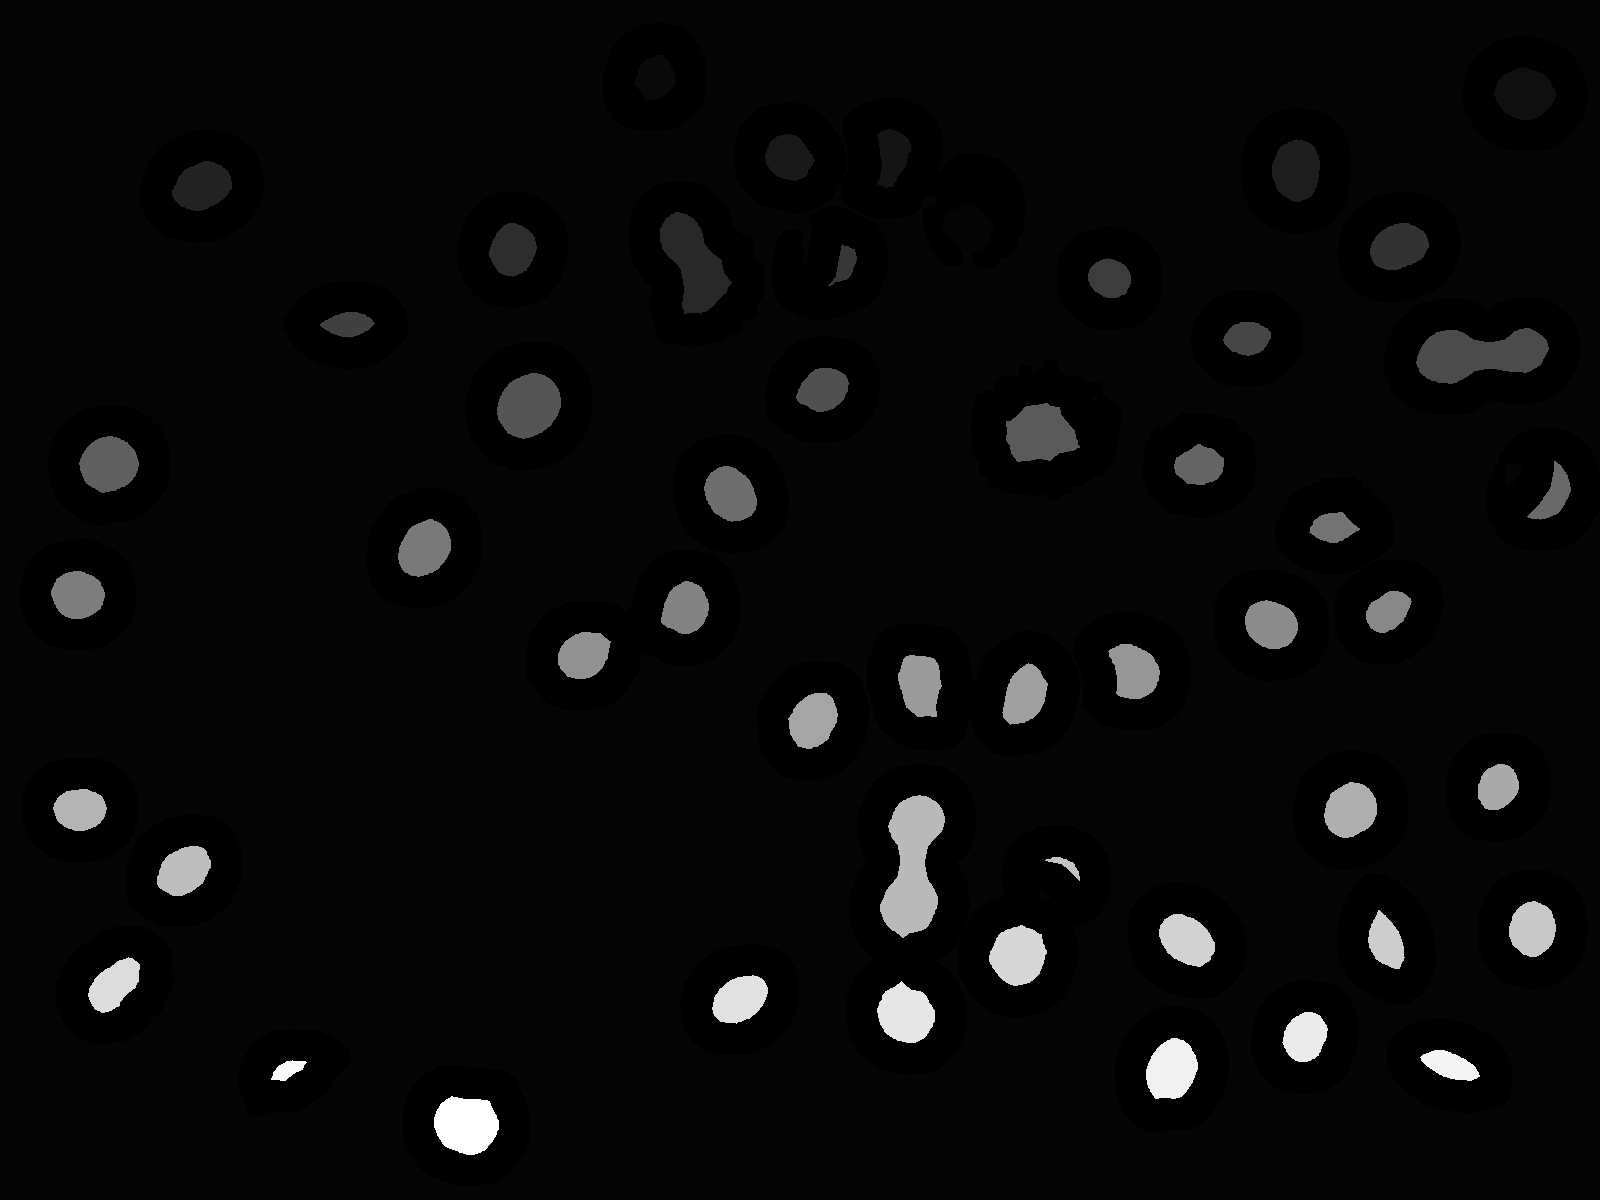

In [27]:
cv2_imshow(markers_normalized)

In [28]:
markers = cv2.watershed(img,markers)

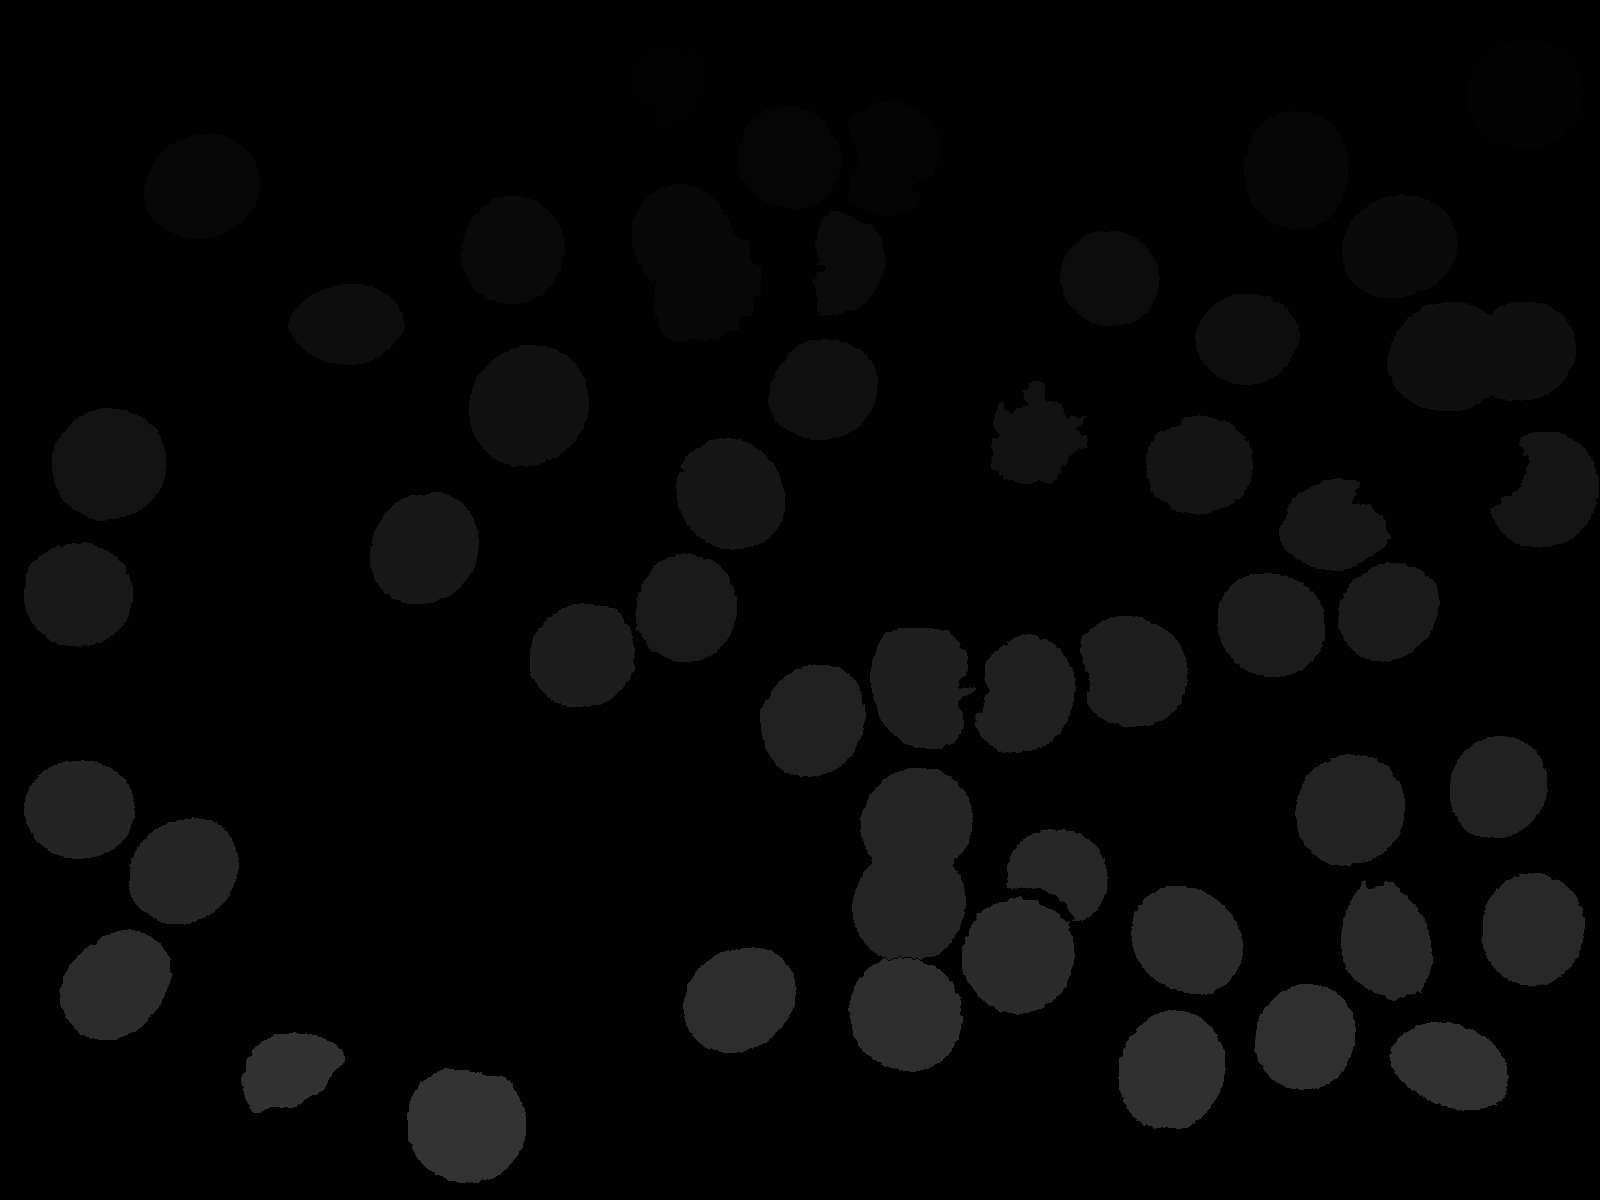

In [29]:
cv2_imshow(markers)

In [30]:
contours,hierarichy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
  if hierarichy[0][i][3] == -1:
    cv2.drawContours(img,contours,i,(255,0,0),10)

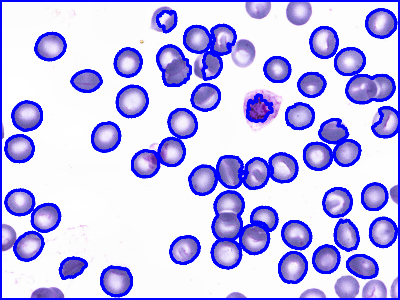

objects number is: 99


In [31]:
resized_image = cv2.resize(img, (400,300))
cv2_imshow(resized_image)
print('objects number is:', format(len(contours)))

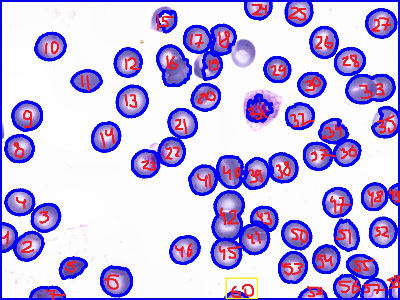

In [ ]:
img3 = cv2.imread("/content/total_counted.jpg")
resized_image = cv2.resize(img3, (400,300))
cv2_imshow(resized_image)

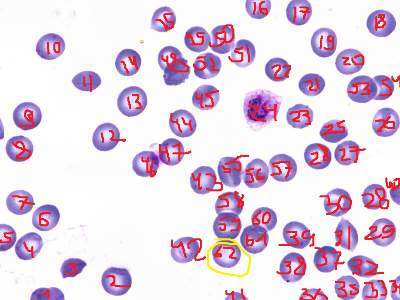

In [ ]:
img2 = cv2.imread("/content/total.jpg")
resized_image = cv2.resize(img2, (400,300))
cv2_imshow(resized_image)

Algorithm was able to find 60 out of aprx. 62 cells, which is quite good for me, but the count of contours gave somehow the number 109 which is not the real one. I can't find the reason for that.

**Update.** Clear_bordering unfortunately didn't help: the counted number is now 99 (10 cells less) which is exactly the number of the bordering units, so it became even worse